In [1]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy
import PIL
import requests

In [2]:
tips = sns.load_dataset("tips")
print(tips)

     total_bill   tip     sex smoker   day    time  size
0         16.99  1.01  Female     No   Sun  Dinner     2
1         10.34  1.66    Male     No   Sun  Dinner     3
2         21.01  3.50    Male     No   Sun  Dinner     3
3         23.68  3.31    Male     No   Sun  Dinner     2
4         24.59  3.61  Female     No   Sun  Dinner     4
..          ...   ...     ...    ...   ...     ...   ...
239       29.03  5.92    Male     No   Sat  Dinner     3
240       27.18  2.00  Female    Yes   Sat  Dinner     2
241       22.67  2.00    Male    Yes   Sat  Dinner     2
242       17.82  1.75    Male     No   Sat  Dinner     2
243       18.78  3.00  Female     No  Thur  Dinner     2

[244 rows x 7 columns]


<Axes: xlabel='total_bill', ylabel='tip'>

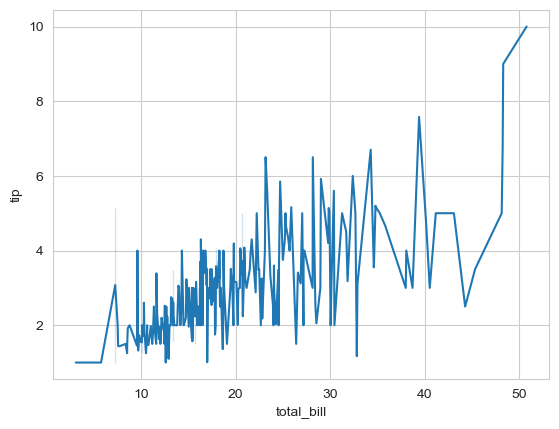

In [7]:
sns.set_style('whitegrid') #alter appearance of plot using premade styles
sns.lineplot(data=tips, # choose dataset
x='total_bill'
, # define x variable
y='tip') # define y variable

<Axes: xlabel='total_bill', ylabel='tip'>

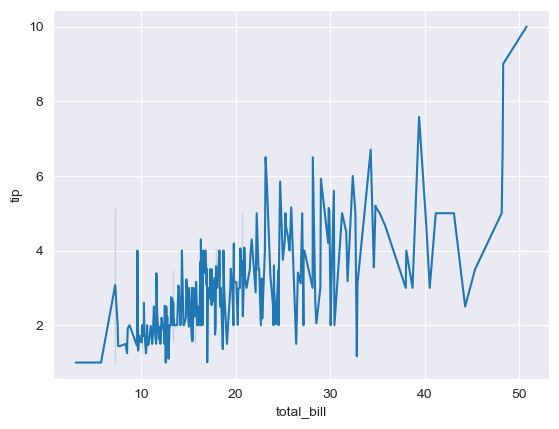

In [8]:
sns.set_style('darkgrid') #alter appearance of plot using premade styles
sns.lineplot(data=tips, # choose dataset
x='total_bill'
, # define x variable
y='tip') # define y variable

<Axes: xlabel='total_bill', ylabel='tip'>

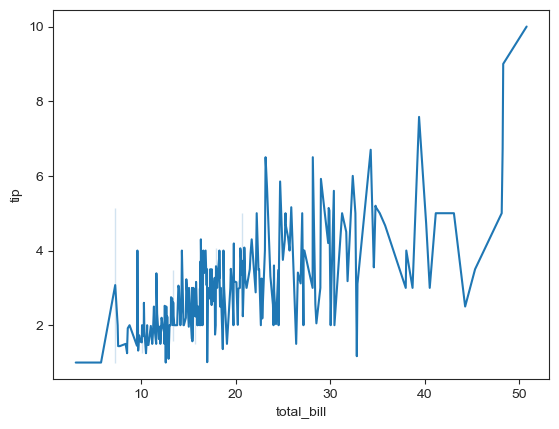

In [9]:
sns.set_style('ticks') #alter appearance of plot using premade styles
sns.lineplot(data=tips, # choose dataset
x='total_bill'
, # define x variable
y='tip') # define y variable

[Text(0.5, 1.0, 'Tips vs. Total Bill'),
 Text(0.5, 0, 'Total Bill ($)'),
 Text(0, 0.5, 'Tip Amount ($)')]

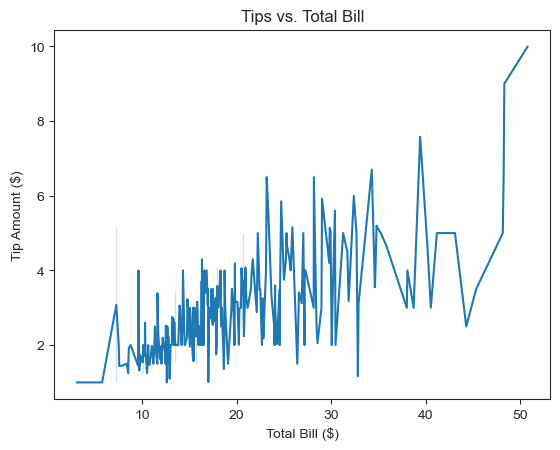

In [10]:
tipgraph = sns.lineplot(data=tips,x='total_bill', y='tip')
#set title, x label, y label
tipgraph.set(title='Tips vs. Total Bill',xlabel='Total Bill ($)',ylabel='Tip Amount ($)')

[Text(0.5, 1.0, 'Tips vs. Total Bill'),
 Text(0.5, 0, 'Total Bill ($)'),
 Text(0, 0.5, 'Tip Amount ($)')]

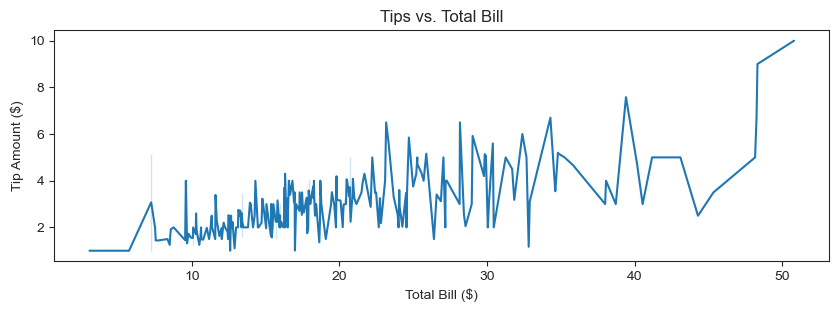

In [15]:
#change figure size
fig = plt.subplots(figsize=(10, 3))

#code from block above:
tipgraph = sns.lineplot(data=tips,x='total_bill', y='tip')
tipgraph.set(title='Tips vs. Total Bill',xlabel='Total Bill ($)',ylabel='Tip Amount ($)')
#set title, x label, y label
tipgraph.set(title='Tips vs. Total Bill',xlabel='Total Bill ($)',ylabel='Tip Amount ($)')

[Text(0.5, 1.0, 'Tips vs. Total Bill'),
 Text(0.5, 0, 'Total Bill ($)'),
 Text(0, 0.5, 'Tip Amount ($)')]

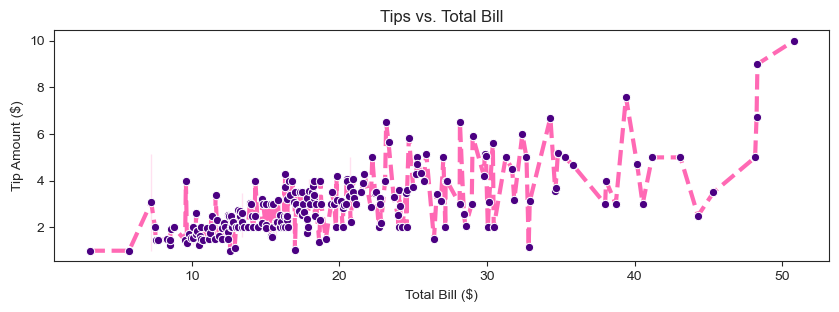

In [19]:
fig = plt.subplots(figsize=(10, 3))
#customize colour, line style, marker style:
tipgraph = sns.lineplot(data=tips,x='total_bill',y='tip',color = 'hotpink',linestyle = '--',linewidth = 3,marker = 'o',markerfacecolor = 'indigo')
tipgraph.set(title='Tips vs. Total Bill',xlabel='Total Bill ($)',ylabel='Tip Amount ($)')

[Text(0.5, 1.0, 'Tips vs. Total Bill'),
 Text(0.5, 0, 'Total Bill ($)'),
 Text(0, 0.5, 'Tip Amount ($)')]

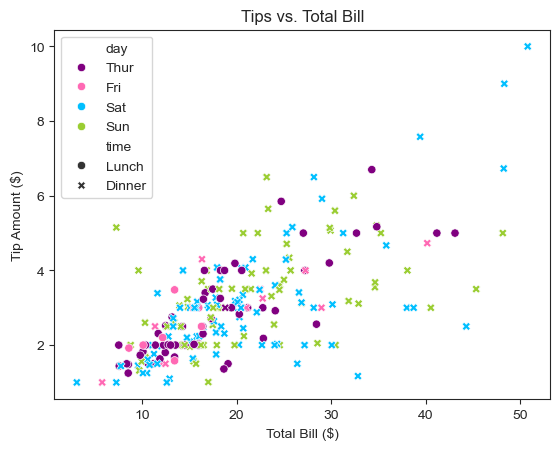

In [21]:
#Changing the colours of markers depending on variable "day", change style of markers according to variable "time"
tipgraph = sns.scatterplot(data=tips, x='total_bill',y='tip', style = 'time' #change marker style according to the time variable
                           ,hue ='day' #change hue (colour) according to the day variable
                           , palette = ['purple','hotpink','deepskyblue','yellowgreen']) #colour palette

tipgraph.set(title='Tips vs. Total Bill',xlabel='Total Bill ($)',ylabel='Tip Amount ($)')

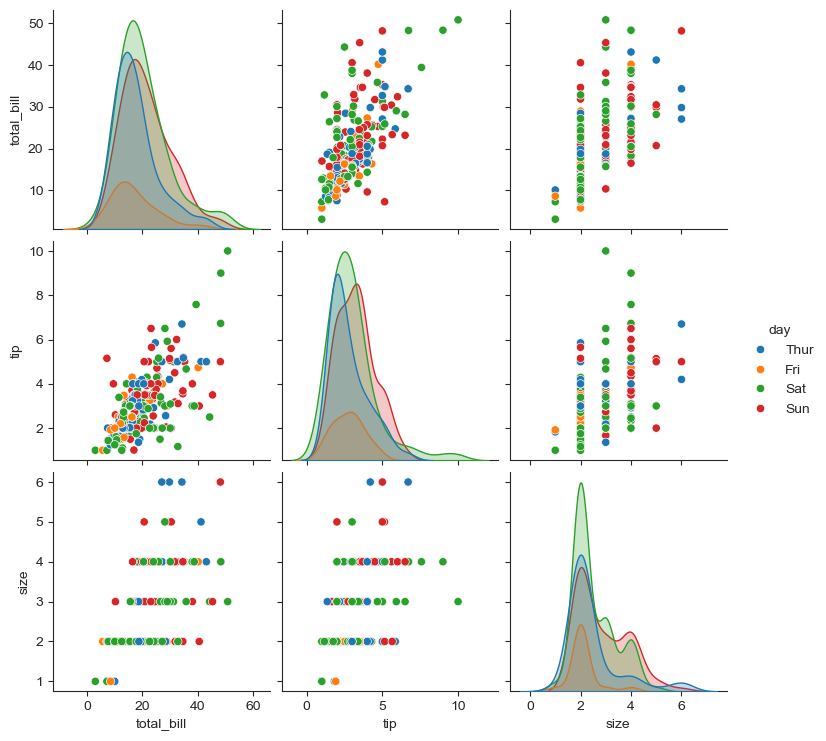

In [22]:
#pairplot allows for comparison of variables
sns.pairplot(data = tips,hue = 'day')

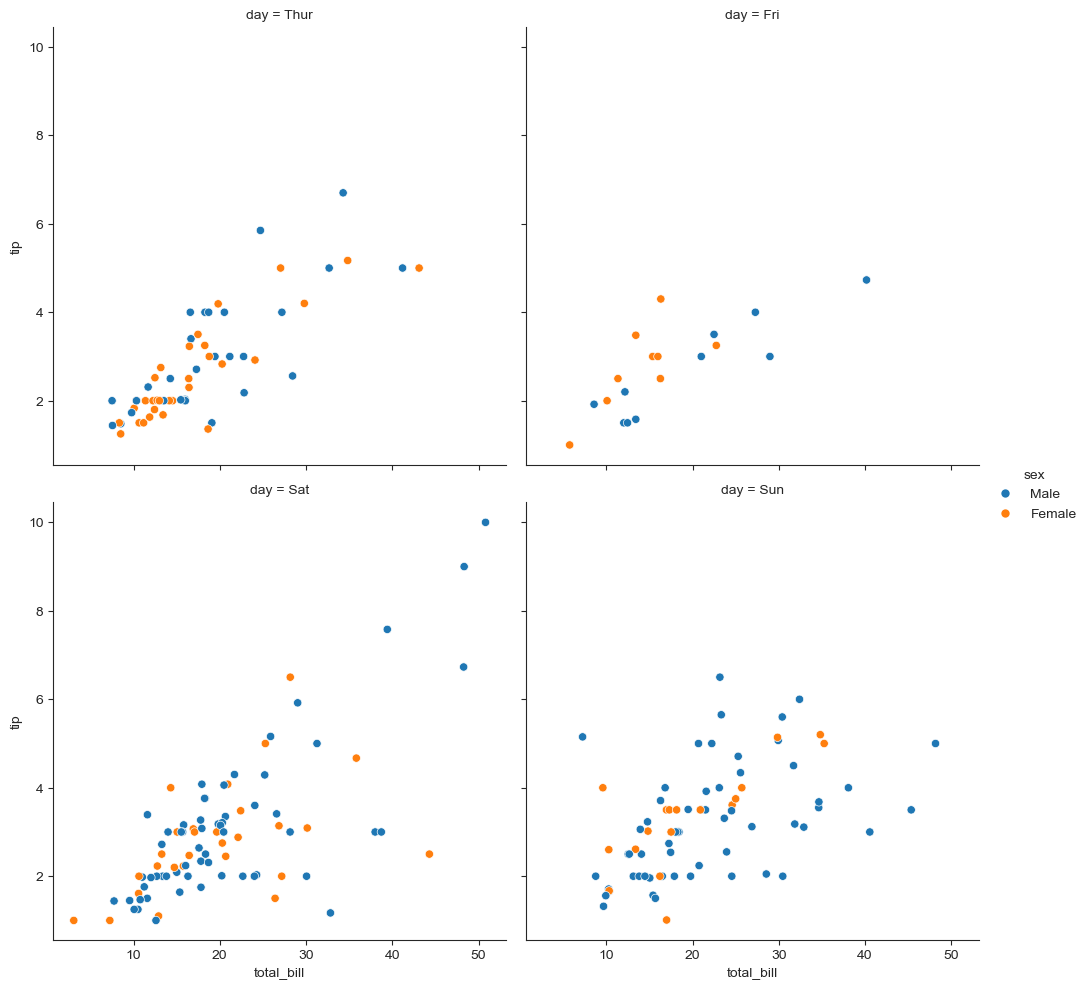

In [24]:
#Replot allows user to explore specific levels between variables
daysplot = sns.relplot(data=tips,x="total_bill",y="tip"
,hue="sex" #different colours for each "sex" variable data point (male/female)
,col="day" #columns are "day" variable (this results in 4 separate graphs ("columns" because there are 4 different data points under variable "day")
,kind="scatter" #scatter plot
,col_wrap=2 #column is wrapped as 2 columns (2 columns per row). If col_wrap was 4, all 4 graphs would be displayed in 1 line side by side.
)

**PLOTLY**

In [25]:
import plotly.graph_objects as go # 'go' is 'graph objects’
x1 = np.array(["Luffy","Zoro","Nami","Usopp","Sanji"])
y1 = np.array([110, 180, 240, 99, 220])

In [26]:
#make figure object (graph)
graph = go.Figure()

#add a trace to the graph object (bar plot)
graph.add_trace(go.Bar(x=x1, y=y1)) #x1 y1 data comes from above code block
#Add figure title and axes titles
graph.update_layout(title="Pirate Scores",xaxis_title="Pirates",yaxis_title="Score")

graph.show()
#note that hovering your cursor over the bars allows more data to be displayed, and there are options to zoom in/out, pan, select, etc. in the top right corner of the figure output

In [ ]:
#Plotly figures can also be saved as an HTML file to be embedded into webpages
graph.write_html("../../folders/pirategraph.html")

In [27]:
#make graph (graph object go.figure, making it a scatter plot this time)
graph = go.Figure()
graph.add_trace(go.Scatter(x=x1, y=y1, mode='markers'
, # mode = "markers" means we want points for a scatter plot

#make dictionary for markers
marker=dict(
size=15, # point size
color='hotpink'
, # point colour
opacity=1, # point transparency/alpha

#make dictionary for lines
line=dict(width=5, color='purple') # point outline
)))
#Layout updates to title, axes titles, image size
graph.update_layout(title='Interactive Pirate Plot',xaxis_title='Pirates',yaxis_title='Scores',width=500, height=500)

**Wordcloud and VennDiagrams**

In [29]:
!pip install wordcloud
from wordcloud import WordCloud
df = pd.read_csv("https://raw.githubusercontent.com/prasertcbs/basic-dataset/master/movie_quotes.csv",
on_bad_lines='skip')
df

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 173.2/173.2 kB 7.9 MB/s eta 0:00:00


,quote,movie,type,year
0,"Do, or do not. There is no try.",Star Wars: Episode V - The Empire Strikes Back,movie,1890
1,Listen to them. Children of the night. What mu...,Dracula,movie,1931
2,It's alive! It's alive!,Frankenstein,movie,1931
3,"Oh, no, it wasn't the airplanes. It was Beauty...",King Kong,movie,1933
4,"Magic Mirror on the wall, who is the fairest o...",Snow White and the Seven Dwarves,movie,1937
...,...,...,...,...
727,I didn't know if you were lost. Stick with me....,Us,movie,2019
728,This guy's awesome! He's holding his own while...,Dragon Ball Super: Broly,movie,2019
729,"Murder is murder, it don’t matter who you are.",Black and Blue,movie,2019
730,You know what a lion is? A lion is a strong an...,Between Two Ferns: The Movie,movie,2019


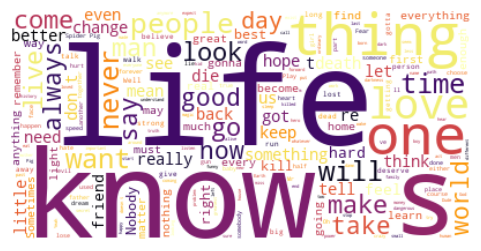

In [30]:
# Using the quote column from the dataset, join all text from each row in quote column into a string
text = " ".join(each for each in df.quote)

# generate our wordcloud image using "WordCloud().generate()", (choose the background colour and a preset colourmap)
wordcloud = WordCloud(background_color="white",
colormap = 'inferno').generate(text)

# use matplotlib syntax to put our image in a figure
fig, ax = plt.subplots(figsize=(7, 3))
ax.imshow(wordcloud, # remember 'imshow' from when we added pictures to our matplotlib axes
interpolation='bilinear') # this line helps smooth our image
ax.axis("off") #
plt.show()

In [31]:
#we can use matplotlib_venn to make venn diagrams
!pip install matplotlib-venn
from matplotlib_venn import venn2, venn2_circles, venn2_unweighted

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.3/40.3 kB 3.2 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for matplotlib-venn: filename=matplotlib_venn-1.1.1-py3-none-any.whl size=45286 sha256=9cec8d46ccb3df08a2be8163423600641c5fd8958e5ab6e79302687073e4a38e
  Stored in directory: /Users/cecilyli/Library/Caches/pip/wheels/5c/4b/48/d68a6531b1e1e7411520ab9f395994eb1ee2ffafd6837b7f6c
Successfully built matplotlib-venn


/opt/miniconda3/envs/dsi_participant/lib/python3.9/site-packages/matplotlib_venn/_util.py:32: UserWarning:

venn2_unweighted is deprecated. Use venn2 with the appropriate layout_algorithm instead.



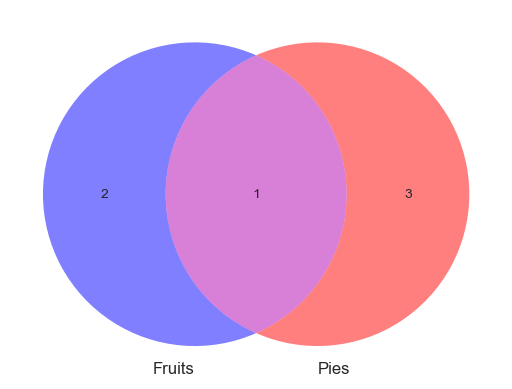

In [32]:
#define data sets
A = set(["apple","banana","watermelon"])
B = set(["pumpkin","blueberry","apple","key lime"])
diagram = venn2_unweighted([A, B],set_labels = ('Fruits'
,'Pies'),set_colors=("blue","red"),alpha=0.5)

plt.show()


/opt/miniconda3/envs/dsi_participant/lib/python3.9/site-packages/matplotlib_venn/_util.py:32: UserWarning:

venn2_unweighted is deprecated. Use venn2 with the appropriate layout_algorithm instead.



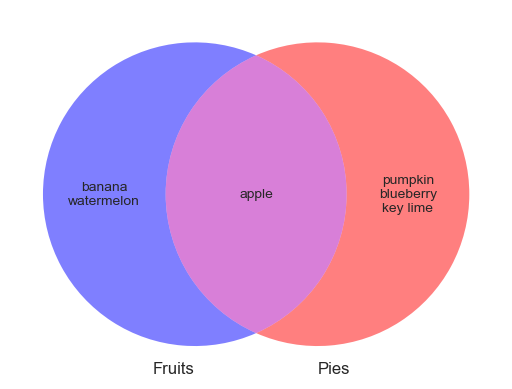

In [33]:
#define data sets
A = set(["apple","banana","watermelon"])
B = set(["pumpkin","blueberry","apple","key lime"])
diagram = venn2_unweighted([A, B],set_labels = ('Fruits'
,'Pies'),set_colors=("blue","red"),alpha=0.5)

#make the left circle (only things that are in set A, not set B)
diagram.get_label_by_id("10").set_text("\n".join(A - B))
#make middle (items in both set A and set B)
diagram.get_label_by_id("11").set_text("\n".join(A & B))
#make right circle (only things that are in set B, and not set A)
diagram.get_label_by_id("01").set_text("\n".join(B - A))

#note that "\n" puts each item in the set on a new line instead of showing them in a single line

plt.show()